# There are a number of techniques that you can check if your data sample is Gaussian or sufficiently Gaussian-like to use the 
standard techniques, or sufficiently non-Gaussian to instead use non-parametric statistical methods. 

Following are the suite of techniques that can be used to check whether a data sample deviates from the normal distribution. 


•	Graphical Methods: These are methods for plotting the data and qualitatively evaluating whether the data looks Gaussian.

        •	Q-Q plots 
        •	Cumulative frequency (P-P) plots
        •	Probability plots

•	Statistical Tests: These are methods that calculate statistics on the data and quantify how likely it is that the data was drawn from a Gaussian distribution.

        •	W/S test 
        •	Jarque-Bera test
        •	Shapiro-Wilks test 
        •	Kolmogorov-Smirnov test 
        •	D’Agostino test


In [56]:
# generate gaussian data
import numpy as np
import matplotlib.pyplot as plt

# Create Test dataset

In [57]:
# seed the random number generator
np.random.seed(1)
# generate univariate observations
data = 5 * np.random.randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))


mean=50.303 stdv=4.426


# Visual Normality Checks

We can create plots of the data to check whether it is Gaussian.

These checks are qualitative.

Less accurate than the statistical methods.

Nevertheless, they are fast.


# Histogram Plot

A simple and commonly used plot to quickly check the distribution of a sample of data is the histogram.

In the histogram, the data is divided into a pre-specified number of groups called bins. The data is then sorted into each bin and the count of the number of observations in each bin is retained.

The plot shows the bins across the x-axis maintaining their ordinal relationship, and the count in each bin on the y-axis.

A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.

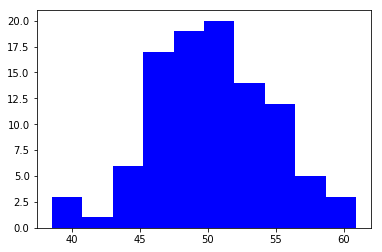

In [58]:
# histogram plot
plt.hist(data,bins=10,color='blue')
plt.show()


# Quantile-Quantile Plot or QQ plot:

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. 
The idealized samples are divided into groups (e.g. 5), called quantiles. 

Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot
to the top right. 

Often a line is drawn on the plot to help make this expectation clear. 

Deviations by the dots from the line shows a deviation from the expected distribution.

We can develop a QQ plot in Python using the qqplot() statsmodels function. 

The function takes the data sample and by default assumes we are comparing it to a Gaussian distribution. 

We can draw the standardized line by setting the ‘line‘ argument to ‘s‘.


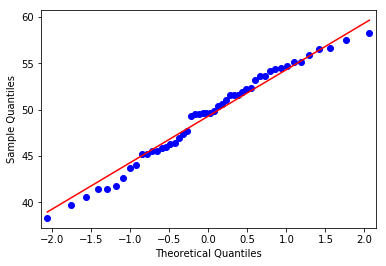

In [84]:
#import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
#statsmodels.graphics.gofplots.ProbPlot.qqplot
# generate univariate observations
data = 5 * randn(50) + 50
# q-q plot
qqplot(data, line='s')
plt.show()

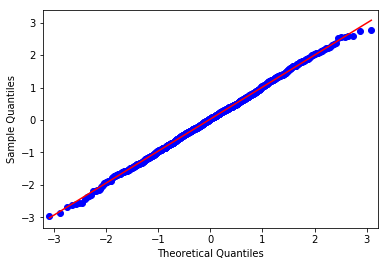

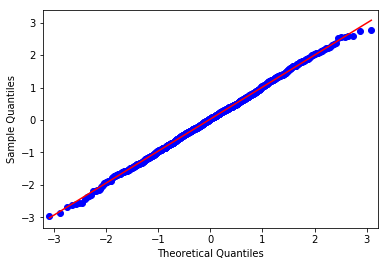

In [88]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
data = norm.rvs(loc=0, scale=1, size=1000)
qqplot(data, line='s')

# PP Plot:
A P-P plot compares the empirical cumulative distribution function of a data set with a specified theoretical 
cumulative distribution function F(·)

In [89]:
import statsmodels.api as sm
#statsmodels.graphics.gofplots.ProbPlot.ppplot
#import statsmodels.api as sm
sm.ppplot(data, line='s')
plt.show()

AttributeError: module 'statsmodels.api' has no attribute 'ppplot'

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

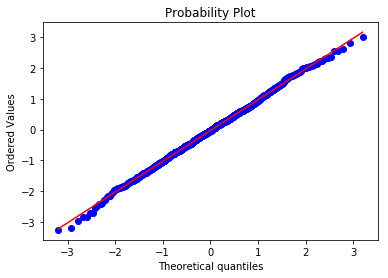

In [67]:
from scipy import stats
from scipy.stats import norm
data = norm.rvs(loc=0, scale=1, size=1000)
stats.probplot(data, plot=plt)

Running the above example creates the QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

There are a few small deviations, especially at the bottom of the plot, which is to be expected given the small data sample

# Statistical Normality Tests
There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution.

Each test makes different assumptions and considers different aspects of the data.


# Interpretation of a Test

Before apply the statistical tests, one must know how to interpret the results.

Each test will return at least two things:

Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.


p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

# Shapiro-Wilk Test

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

The complete example of performing the Shapiro-Wilk test on the dataset is listed below.

In [92]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


# Anderson-Darling Test
Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

The complete example of calculating the Anderson-Darling test on the sample problem is listed below.

In [95]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


# D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

The complete example of the D’Agostino’s K^2 test on the dataset is listed below.

In [96]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)
